In [1]:
import pandas as pd
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




# Prepare Data

In [2]:
sheet1 = pd.read_csv('sheet1.csv',header=0)
sheet1 = sheet1.dropna(subset=['permeability (LMH/bar)'], ignore_index=True)

In [3]:
X = sheet1.iloc[:,1:21]
Y_P = sheet1.iloc[:,21]

# Linear Model P 


In [4]:
X_onehot=pd.get_dummies(data=X, drop_first=True).fillna(0)
test_size = 0.2
X_linear_train, X_linear_test, Y_P_linear_train, Y_P_linear_test = train_test_split(X_onehot, Y_P, test_size=test_size, random_state=7)

In [5]:
reg = LinearRegression().fit(X_linear_train, Y_P_linear_train)
Y_P_linear_test_pred=reg.predict(X_linear_test)
Y_P_linear_train_pred=reg.predict(X_linear_train)
print('Test R2: {}'.format(metrics.r2_score(Y_P_linear_test_pred, Y_P_linear_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(Y_P_linear_test_pred, Y_P_linear_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_P_linear_test_pred, Y_P_linear_test))))

print('Train R2: {}'.format(metrics.r2_score(Y_P_linear_train_pred, Y_P_linear_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(Y_P_linear_train_pred, Y_P_linear_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_P_linear_train_pred, Y_P_linear_train))))

Test R2: -0.02652565637507065
Test MSE: 38303.524577014396
Test RMSE: 195.7128625742682
Train R2: -0.8981580823403732
Train MSE: 2370.7704326675325
Train RMSE: 48.690557941633124


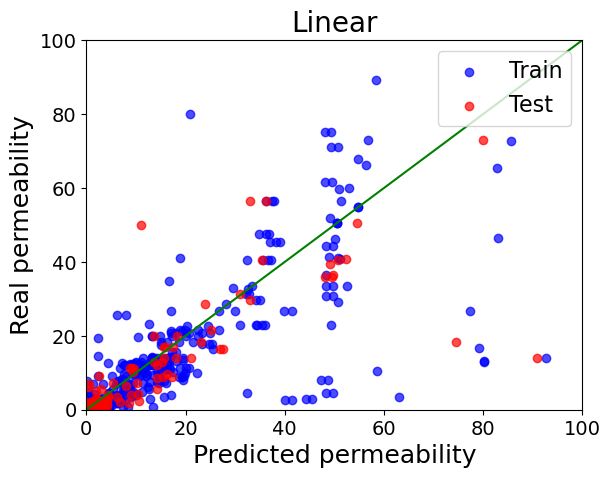

In [6]:
x=[0,100]
plt.plot(x,x,color='g')
plt.scatter(Y_P_linear_train_pred,Y_P_linear_train,color='b',label='Train',alpha=0.7)
plt.scatter(Y_P_linear_test_pred,Y_P_linear_test,color='r',label='Test',alpha=0.7)
plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.xlabel('Predicted permeability',fontsize=18)
plt.ylabel('Real permeability',fontsize=18)
plt.title('Linear',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

# Random Forest P


In [7]:
X_onehot=pd.get_dummies(data=X, drop_first=True).fillna(0)
test_size = 0.2
X_RF_train, X_RF_test, Y_P_RF_train, Y_P_RF_test = train_test_split(X_onehot, Y_P, test_size=test_size, random_state=7)

In [8]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_RF_train, Y_P_RF_train)
Y_P_RF_train_pred=regr.predict(X_RF_train)
Y_P_RF_test_pred=regr.predict(X_RF_test)

print('Test R2: {}'.format(metrics.r2_score(Y_P_RF_test_pred, Y_P_RF_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(Y_P_RF_test_pred, Y_P_RF_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_P_RF_test_pred, Y_P_RF_test))))

print('Train R2: {}'.format(metrics.r2_score(Y_P_RF_train_pred, Y_P_RF_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(Y_P_RF_train_pred, Y_P_RF_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_P_RF_train_pred, Y_P_RF_train))))

Test R2: 0.8953692935579122
Test MSE: 26.04175723497154
Test RMSE: 5.1031125046359245
Train R2: 0.9472236734934266
Train MSE: 142.8974661817818
Train RMSE: 11.953972820020205


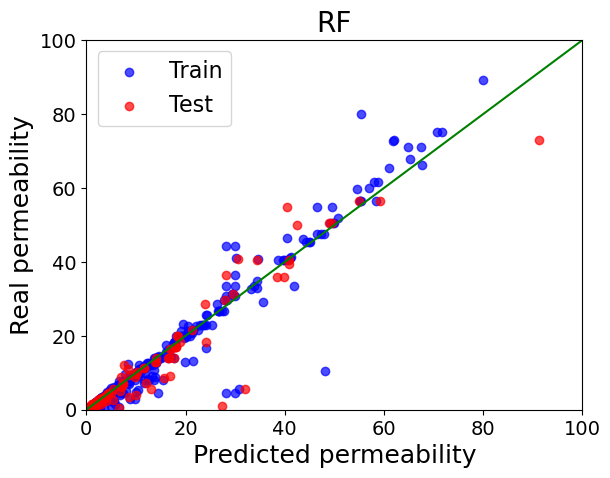

In [9]:
x=[0,100]
plt.plot(x,x,color='g')
plt.scatter(Y_P_RF_train_pred,Y_P_RF_train,color='b',label='Train',alpha=0.7)
plt.scatter(Y_P_RF_test_pred,Y_P_RF_test,color='r',label='Test',alpha=0.7)
plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.xlabel('Predicted permeability',fontsize=18)
plt.ylabel('Real permeability',fontsize=18)
plt.title('RF',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

# Boosted Tree P

In [10]:
X_onehot=pd.get_dummies(data=X, drop_first=True).fillna(0)
test_size = 0.2
X_BT_train, X_BT_test, Y_P_BT_train, Y_P_BT_test = train_test_split(X_onehot, Y_P, test_size=test_size, random_state=7)

In [11]:
params = {
    "n_estimators": 500,
    "max_depth": 30,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = GradientBoostingRegressor(**params)
reg.fit(X_BT_train, Y_P_BT_train)
Y_P_BT_train_pred=reg.predict(X_BT_train)
Y_P_BT_test_pred=reg.predict(X_BT_test)
print('Test R2: {}'.format(metrics.r2_score(Y_P_BT_test_pred, Y_P_BT_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(Y_P_BT_test_pred, Y_P_BT_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_P_BT_test_pred, Y_P_BT_test))))

print('Train R2: {}'.format(metrics.r2_score(Y_P_BT_train_pred, Y_P_BT_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(Y_P_BT_train_pred, Y_P_BT_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_P_BT_train_pred, Y_P_BT_train))))

Test R2: 0.8174497861400889
Test MSE: 64.04597993176782
Test RMSE: 8.002873229769907
Train R2: 0.9983345376550116
Train MSE: 5.888626365889611
Train RMSE: 2.4266492053631508


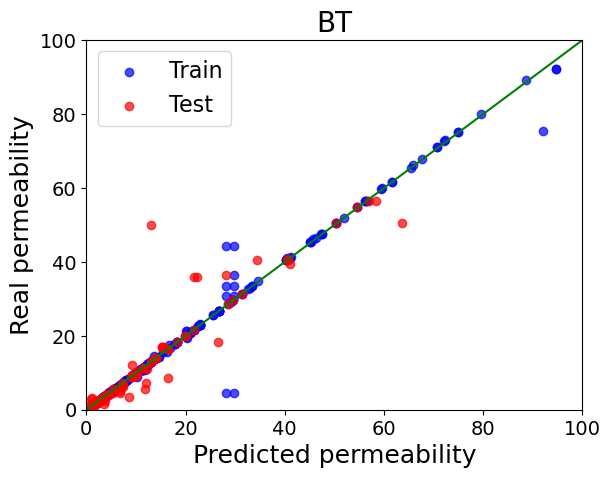

In [12]:
x=[0,100]
plt.plot(x,x,color='g')

plt.scatter(Y_P_BT_train_pred,Y_P_BT_train,color='b',label='Train',alpha=0.7)
plt.scatter(Y_P_BT_test_pred,Y_P_BT_test,color='r',label='Test',alpha=0.7)
plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.xlabel('Predicted permeability',fontsize=18)
plt.ylabel('Real permeability',fontsize=18)
plt.title('BT',fontsize=20)
plt.legend(fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# XGBooster P

In [13]:
X["Substrate"]=X["Substrate"].astype("category")
X["method"]=X["method"].astype("category")
X["polycation"]=X["polycation"].astype("category")
X["polyanion"]=X["polyanion"].astype("category")
X["cross-linker"]=X["cross-linker"].astype("category")
X["surface charge (+/-)"]=X["surface charge (+/-)"].astype("category")
X["solute"]=X["solute"].astype("category")
X["solute charge (+/)"]=X["solute charge (+/)"].astype("category")
test_size = 0.2

X=X.rename(columns={"concentration (g/L)": "polycation concentration (g/L)", "concentration (g/L).1": "polyanion concentration (g/L)", "Ionic strength (IS)": "Ionic strength (polycation solution)", "Ionic strength (IS).1": "Ionic strength (polyanion solution)"})
X=X.rename(columns={"duration (min)": "polycation reaction duration", "duration (min).1": "polyanion reaction duration", "duration (min).2": "cross-linking duration", "concnetration (wt%)": "cross-linker concentration (wt%)"})
X_XGB_train, X_XGB_test, y_P_XGB_train, y_P_XGB_test = train_test_split(X, Y_P, test_size=test_size, random_state=250)
Xd_P_XGB_all = xgb.DMatrix(X, label=Y_P, enable_categorical=True)
Xd_P_XGB_train = xgb.DMatrix(X_XGB_train, label=y_P_XGB_train, enable_categorical=True)
Xd_P_XGB_test = xgb.DMatrix(X_XGB_test, label=y_P_XGB_test, enable_categorical=True)

In [14]:
model_XGB = xgb.train({
    'eta':1, 'max_depth':20, 'base_score': 0, "lambda": 0
}, Xd_P_XGB_train, 1)

# model = XGBRegressor(tree_method="hist", enable_categorical=True,missing=np.nan)
# model.fit(X_XGB_train, y_P_XGB_train)
y_P_XGB_test_pred=model_XGB.predict(Xd_P_XGB_test)
y_P_XGB_train_pred=model_XGB.predict(Xd_P_XGB_train)

print('Test R2: {}'.format(metrics.r2_score(y_P_XGB_test_pred, y_P_XGB_test)))
print('Test MSE: {}'.format((metrics.mean_squared_error(y_P_XGB_test_pred, y_P_XGB_test))))
print('Test RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_P_XGB_test_pred, y_P_XGB_test))))

print('Train R2: {}'.format(metrics.r2_score(y_P_XGB_train_pred, y_P_XGB_train)))
print('Train MSE: {}'.format(metrics.mean_squared_error(y_P_XGB_train_pred, y_P_XGB_train)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_P_XGB_train_pred, y_P_XGB_train))))

Test R2: 0.997532527355621
Test MSE: 14.225677742846022
Test RMSE: 3.7716942801406934
Train R2: 0.9979965141429464
Train MSE: 4.495065001746845
Train RMSE: 2.1201568342334594


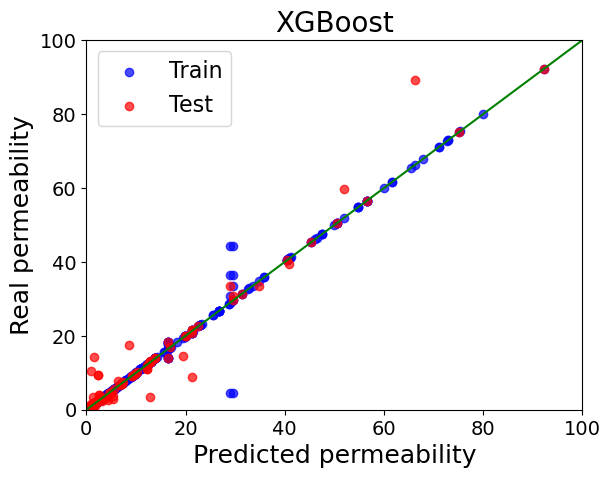

In [15]:
x=[0,100]
plt.plot(x,x,color='g')
plt.scatter(y_P_XGB_train_pred,y_P_XGB_train,color='b',label='Train',alpha=0.7)
plt.scatter(y_P_XGB_test_pred,y_P_XGB_test,color='r',label='Test',alpha=0.7)

plt.xlim(0, 100) 
plt.ylim(0, 100) 
plt.xlabel('Predicted permeability',fontsize=18)
plt.ylabel('Real permeability',fontsize=18)
plt.title('XGBoost',fontsize=20)
plt.legend(fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()